In [16]:
import random
import numpy as np
import math
from matplotlib.patches import Rectangle, Circle
import matplotlib.pyplot as plt

In [17]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def set_closest_node(self, c):
        self.close_node = c 
    def get_closest_node(self):
        return self.close_node 
    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Node(x,y)
    def __pow__(self, power):
        x = self.x**power
        y = self.y**power
        return (x,y)
    def __mul__(self, b):
        x = self.x*b
        y = self.y*b
        return Node(x,y)
    def __truediv__(self, b):
        x = self.x/b
        y = self.y/b
        return Node(x,y)
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Node(x,y)
    def __eq__(self, other):
        if other.x == self.x and other.y == self.y:
            return True
        return False
    def print_path(self):
        length = 0
        node = self
        x_values = []
        y_values = []
        print("Nodes in path to destination")
        while(not node==start):
            print(node.x, node.y)
            x_values.append(node.x)
            y_values.append(node.y)
            node = node.get_closest_node()
            length +=1
        print(start.x, start.y)
        x_values.append(start.x)
        y_values.append(start.y)
        ax.plot(x_values, y_values, '.-', color="black")
        return length


In [18]:
sx, sy = input("Please enter Starting co-ordinates separated by a comma").split(',')
sx = int(sx)
sy = int(sy)

start = Node(sx,sy) #0 0

dx, dy = input("Please enter Destination co-ordinates").split(',')
dx = int(dx)
dy = int(dy)
dest = Node(dx,dy) #-5 10

#Distance between nodes
step = 5 
#Radius around the destination that will be considered as destination
radius = 2 
radius_sq = radius**2
#No of iterations to run
iterations = int(input("Enter number of iterations to run")) #100

no_obstacles = int(input("Enter number of obstacles"))
obstacles = []

for i in range(no_obstacles):
    sides = []
    px, py = input("Enter co-ordinates of the top left point for obstacle").split(',')
    px = float(px)
    py = float(py)
    length = float(input("Enter length of obstacle"))
    breadth = float(input("Enter breadth of obstacle"))
    sides.append(Node(px, py-breadth))
    sides.append(Node(px+length, py-breadth))
    sides.append(Node(px+length, py))
    sides.append(Node(px, py))
    obstacles.append(sides)
# Imagining box to be 100 * 100

Enter co-ordinates of the top left point for obstacle 1


In [19]:
def closest_node(new_point, nodes):
    node = (new_point.x, new_point.y)
    l = [(x.x, x.y) for x in nodes]
    l = np.asarray(l)
    dist_2 = np.sum((l - node)**2, axis=1)
    index = np.argmin(dist_2)
    return (index, dist_2[index]) 

In [20]:
def reach(node):
    dist = np.sum((dest-node)**2)
    if dist <= radius_sq:
        return True
    else:
        return False

In [21]:
def check(p1, q1):
    for ob in obstacles:
        for p in range(4):
            p2 = ob[p]
            q2 = ob[(p+1)%4]
            if doIntersect(p1, q1, p2, q2):
                return False
    return True

In [22]:
def onSegment(p, q, r):
    if ( (q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and 
           (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))):
        return True
    return False
  
def orientation(p, q, r):
    # to find the orientation of an ordered triplet (p,q,r)
    # function returns the following values:
    # 0 : Colinear points
    # 1 : Clockwise points
    # 2 : Counterclockwise
    
    val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y))
    if (val > 0):
          
        # Clockwise orientation
        return 1
    elif (val < 0):
          
        # Counterclockwise orientation
        return 2
    else:
          
        # Colinear orientation
        return 0
  
# Check the line segment 'p1q1' and 'p2q2' intersect.
def doIntersect(p1,q1,p2,q2):
      
    # Find the 4 orientations required for the general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
  
    # General case
    if ((o1 != o2) and (o3 != o4)):
        return True
  
    # Special Cases
  
    # p1 , q1 and p2 are colinear and p2 lies on segment p1q1
    if ((o1 == 0) and onSegment(p1, p2, q1)):
        return True
  
    # p1 , q1 and q2 are colinear and q2 lies on segment p1q1
    if ((o2 == 0) and onSegment(p1, q2, q1)):
        return True
  
    # p2 , q2 and p1 are colinear and p1 lies on segment p2q2
    if ((o3 == 0) and onSegment(p2, p1, q2)):
        return True
  
    # p2 , q2 and q1 are colinear and q1 lies on segment p2q2
    if ((o4 == 0) and onSegment(p2, q1, q2)):
        return True
  
    # If none of the cases
    return False

Destination not reached


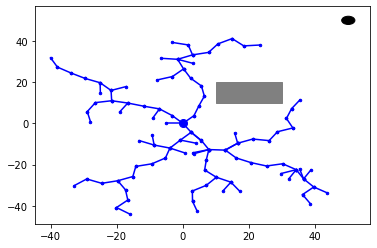

In [23]:
nodes = [start]
fig, ax = plt.subplots()
plt.ion()


for i in range(iterations):
    
    #Randomly generate a point on the screen
    new_point = Node(random.randint(-50, 50), random.randint(-50, 50))

    #find the closest node in the tree
    index, dist_sq = closest_node(new_point, nodes)
    
    close_node = nodes[index]
    dist = (math.sqrt(dist_sq))
    
    #if randomly generated node already exists in the tree
    if dist == 0:
        print("Distance is 0")
        i-=1
        continue
    
    #Generate a new node to add to the tree at the set distance apart
    new_node = ((new_point - close_node) * step/dist)
    new_node = ((new_node + close_node))
    
    #new_node = tuple(round(x) for x in new_node)
    
    #Check if this new node lands on an obstacle
    if(check(close_node, new_node) == False):
        i-=1
        continue
    
    new_node.set_closest_node(close_node)
    nodes.append(new_node)
    
    x_values = [close_node.x, new_node.x]
    y_values = [close_node.y, new_node.y]

    plt.plot(x_values, y_values, '.-', markersize = 5,  color="blue" )
    
    if reach(new_node):
        print("Reached")
        print("Length of path", new_node.print_path())
        break 
    
    
else:
    print("Destination not reached")


#Drawing the obstacles
for ob in obstacles:
    bottom_left = (ob[0].x, ob[0].y)
    length = ob[1].x - ob[0].x
    breadth = ob[2].y - ob[1].y
    ax.add_patch(Rectangle(bottom_left, length, breadth, color ='grey', linestyle="solid") )


ax.add_patch( Circle((dest.x, dest.y), radius, color="black"))
plt.plot(start.x, start.y, 'o', markersize=8, color = "blue")
